In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [4]:
# Load data
df = pd.read_csv(
        "/Users/kanadb/Work/IIT-KGP Summer/cancer-research/datasets/UCSC-Xena-Copy-Number-Gene-Level-GISTIC2-Thresholded/TCGA.BRCA.sampleMap_Gistic2_CopyNumber_Gistic2_all_thresholded.by_genes", 
        sep='\t'
    )

print(df.shape)
df.head()

(24776, 1081)


,Gene Symbol,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5L-AAT1-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
0,ACAP3,0,-1,-1,0,0,0,0,-1,0,...,0,-1,0,0,-1,-1,0,-1,-1,0
1,ACTRT2,0,-1,-1,0,0,0,0,-1,0,...,0,-1,0,0,-1,-1,0,-1,-1,0
2,AGRN,0,-1,-1,0,0,0,0,-1,0,...,0,-1,0,0,-1,-1,0,-1,-1,0
3,ANKRD65,0,-1,-1,0,0,0,0,-1,0,...,0,-1,0,0,-1,-1,0,-1,-1,0
4,ATAD3A,0,-1,-1,0,0,0,0,-1,0,...,0,-1,0,0,-1,-1,0,-1,-1,0


In [5]:
df.columns

Index(['Gene Symbol', 'TCGA-3C-AAAU-01', 'TCGA-3C-AALI-01', 'TCGA-3C-AALJ-01',
       'TCGA-3C-AALK-01', 'TCGA-4H-AAAK-01', 'TCGA-5L-AAT0-01',
       'TCGA-5L-AAT1-01', 'TCGA-5T-A9QA-01', 'TCGA-A1-A0SB-01',
       ...
       'TCGA-UL-AAZ6-01', 'TCGA-UU-A93S-01', 'TCGA-V7-A7HQ-01',
       'TCGA-W8-A86G-01', 'TCGA-WT-AB41-01', 'TCGA-WT-AB44-01',
       'TCGA-XX-A899-01', 'TCGA-XX-A89A-01', 'TCGA-Z7-A8R5-01',
       'TCGA-Z7-A8R6-01'],
      dtype='object', length=1081)

In [6]:
# Set index and clean
df = df.set_index("Gene Symbol")
df = df.apply(pd.to_numeric, errors='coerce')

# df = df.dropna() # df = df.dropna(how="any") # removes rows with any NaN entry
df = df.dropna(how="all") # remove rows with with all NaN entries

df = df.fillna(0)  # assume missing as normal copy number (neutral)

df.columns

Index(['TCGA-3C-AAAU-01', 'TCGA-3C-AALI-01', 'TCGA-3C-AALJ-01',
       'TCGA-3C-AALK-01', 'TCGA-4H-AAAK-01', 'TCGA-5L-AAT0-01',
       'TCGA-5L-AAT1-01', 'TCGA-5T-A9QA-01', 'TCGA-A1-A0SB-01',
       'TCGA-A1-A0SD-01',
       ...
       'TCGA-UL-AAZ6-01', 'TCGA-UU-A93S-01', 'TCGA-V7-A7HQ-01',
       'TCGA-W8-A86G-01', 'TCGA-WT-AB41-01', 'TCGA-WT-AB44-01',
       'TCGA-XX-A899-01', 'TCGA-XX-A89A-01', 'TCGA-Z7-A8R5-01',
       'TCGA-Z7-A8R6-01'],
      dtype='object', length=1080)

In [7]:
# Verify all genes appear only once (are unique)
print(df.index.value_counts())
print(len(df.index.unique()))

Gene Symbol
ACAP3                         1
WDR89                         1
LRRC9                         1
MIR5586                       1
RTN1                          1
                             ..
SNORD112|ENSG00000252932.1    1
HTR1B                         1
U6|ENSG00000272445.1          1
IMPG1                         1
WASIR1|ENSG00000185203.7      1
Name: count, Length: 24776, dtype: int64
24776


In [9]:
# Check for Isoforms
# Check gene names ending with .<digit> (.1, .10, .99 so on)
genes_with_suffix = df.index[df.index.str.contains(r"\.\d+$")]

# Convert to list
genes_with_suffix = genes_with_suffix.tolist()

# Convert to Series to count occurrences
gene_suffix_counts = pd.Series(genes_with_suffix).value_counts()

# Top 50
print(genes_with_suffix[:50])
# print(gene_suffix_counts)

['snoU13|ENSG00000239166.1', 'SNORA77|ENSG00000221083.1', 'SCARNA16|ENSG00000252404.1', 'snoU13|ENSG00000271794.1', 'SNORA70|ENSG00000252969.1', 'snoU13|ENSG00000238771.1', 'SCARNA11|ENSG00000253085.1', 'SCARNA21|ENSG00000251866.1', 'snoU13|ENSG00000238818.1', 'U1|ENSG00000228549.2', 'U1|ENSG00000233421.3', 'snoU13|ENSG00000239020.1', 'snoU13|ENSG00000239027.1', 'snoU13|ENSG00000238538.1', 'snoU13|ENSG00000238986.1', 'snoU13|ENSG00000238889.1', 'SCARNA17|ENSG00000252190.1', 'SCARNA18|ENSG00000252691.1', 'snoU13|ENSG00000238316.1', 'snoU13|ENSG00000238821.1', 'SCARNA24|ENSG00000252777.1', 'SNORD112|ENSG00000252728.1', 'SNORA62|ENSG00000201542.1', 'SNORA63|ENSG00000201448.1', 'snoU13|ENSG00000238871.1', 'SNORA63|ENSG00000252448.1', 'SNORD46|ENSG00000200913.1', 'snoU13|ENSG00000238945.1', 'snoU13|ENSG00000239144.1', 'snoU13|ENSG00000238618.1', 'SNORA26|ENSG00000212624.1', 'snoU13|ENSG00000239063.1', 'SNORA58|ENSG00000201003.1', 'SNORD112|ENSG00000252646.1', 'snoU13|ENSG00000238931.1', 'SN

In [10]:
# Round -> nearest whole number (1.8 -> 2, -1.4 -> -1) and 
# Clip values to -2, -1, 0, 1, 2 (value < -2 -> -2, any value > 2 -> 2)
df = df.round(0).clip(-2, 2).astype(int)
df.head()

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5L-AAT1-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
ACAP3,0,-1,-1,0,0,0,0,-1,0,-1,...,0,-1,0,0,-1,-1,0,-1,-1,0
ACTRT2,0,-1,-1,0,0,0,0,-1,0,-1,...,0,-1,0,0,-1,-1,0,-1,-1,0
AGRN,0,-1,-1,0,0,0,0,-1,0,-1,...,0,-1,0,0,-1,-1,0,-1,-1,0
ANKRD65,0,-1,-1,0,0,0,0,-1,0,-1,...,0,-1,0,0,-1,-1,0,-1,-1,0
ATAD3A,0,-1,-1,0,0,0,0,-1,0,-1,...,0,-1,0,0,-1,-1,0,-1,-1,0


In [11]:
data = df.values
data

array([[ 0, -1, -1, ..., -1, -1,  0],
       [ 0, -1, -1, ..., -1, -1,  0],
       [ 0, -1, -1, ..., -1, -1,  0],
       ...,
       [-1, -1,  0, ..., -1,  0,  1],
       [-1, -1,  0, ..., -1,  0,  1],
       [-1, -1,  0, ..., -1,  0,  1]])

In [12]:
# Get rows (genes) where any sample has an individual value
# axis=0 -> column wise, axis=1 -> row wise
genes_with_amp = df[df.eq(-2).any(axis=1)].index.tolist() # check each row (gene) to see if 'any' sample has -2
genes_with_amp[:5]

['ACAP3', 'ACTRT2', 'AGRN', 'ANKRD65', 'ATAD3A']

In [13]:
# Create colormap
cmap = mcolors.ListedColormap([
    '#800000',  # dark red (-2)
    '#ff6666',  # light red (-1)
    '#ffffff',  # white (0)
    '#6699ff',  # light blue (1)
    '#000080'   # dark blue (2)
])

# Set bins to map colors to
bounds = [-2.5, -1.5, -0.5, 0.5, 1.5, 2.5]

# value = -2 -> falls in [-2.5, -1.5] -> norm maps it to index 0 -> cmap(0) = dark red
norm = mcolors.BoundaryNorm(bounds, cmap.N)

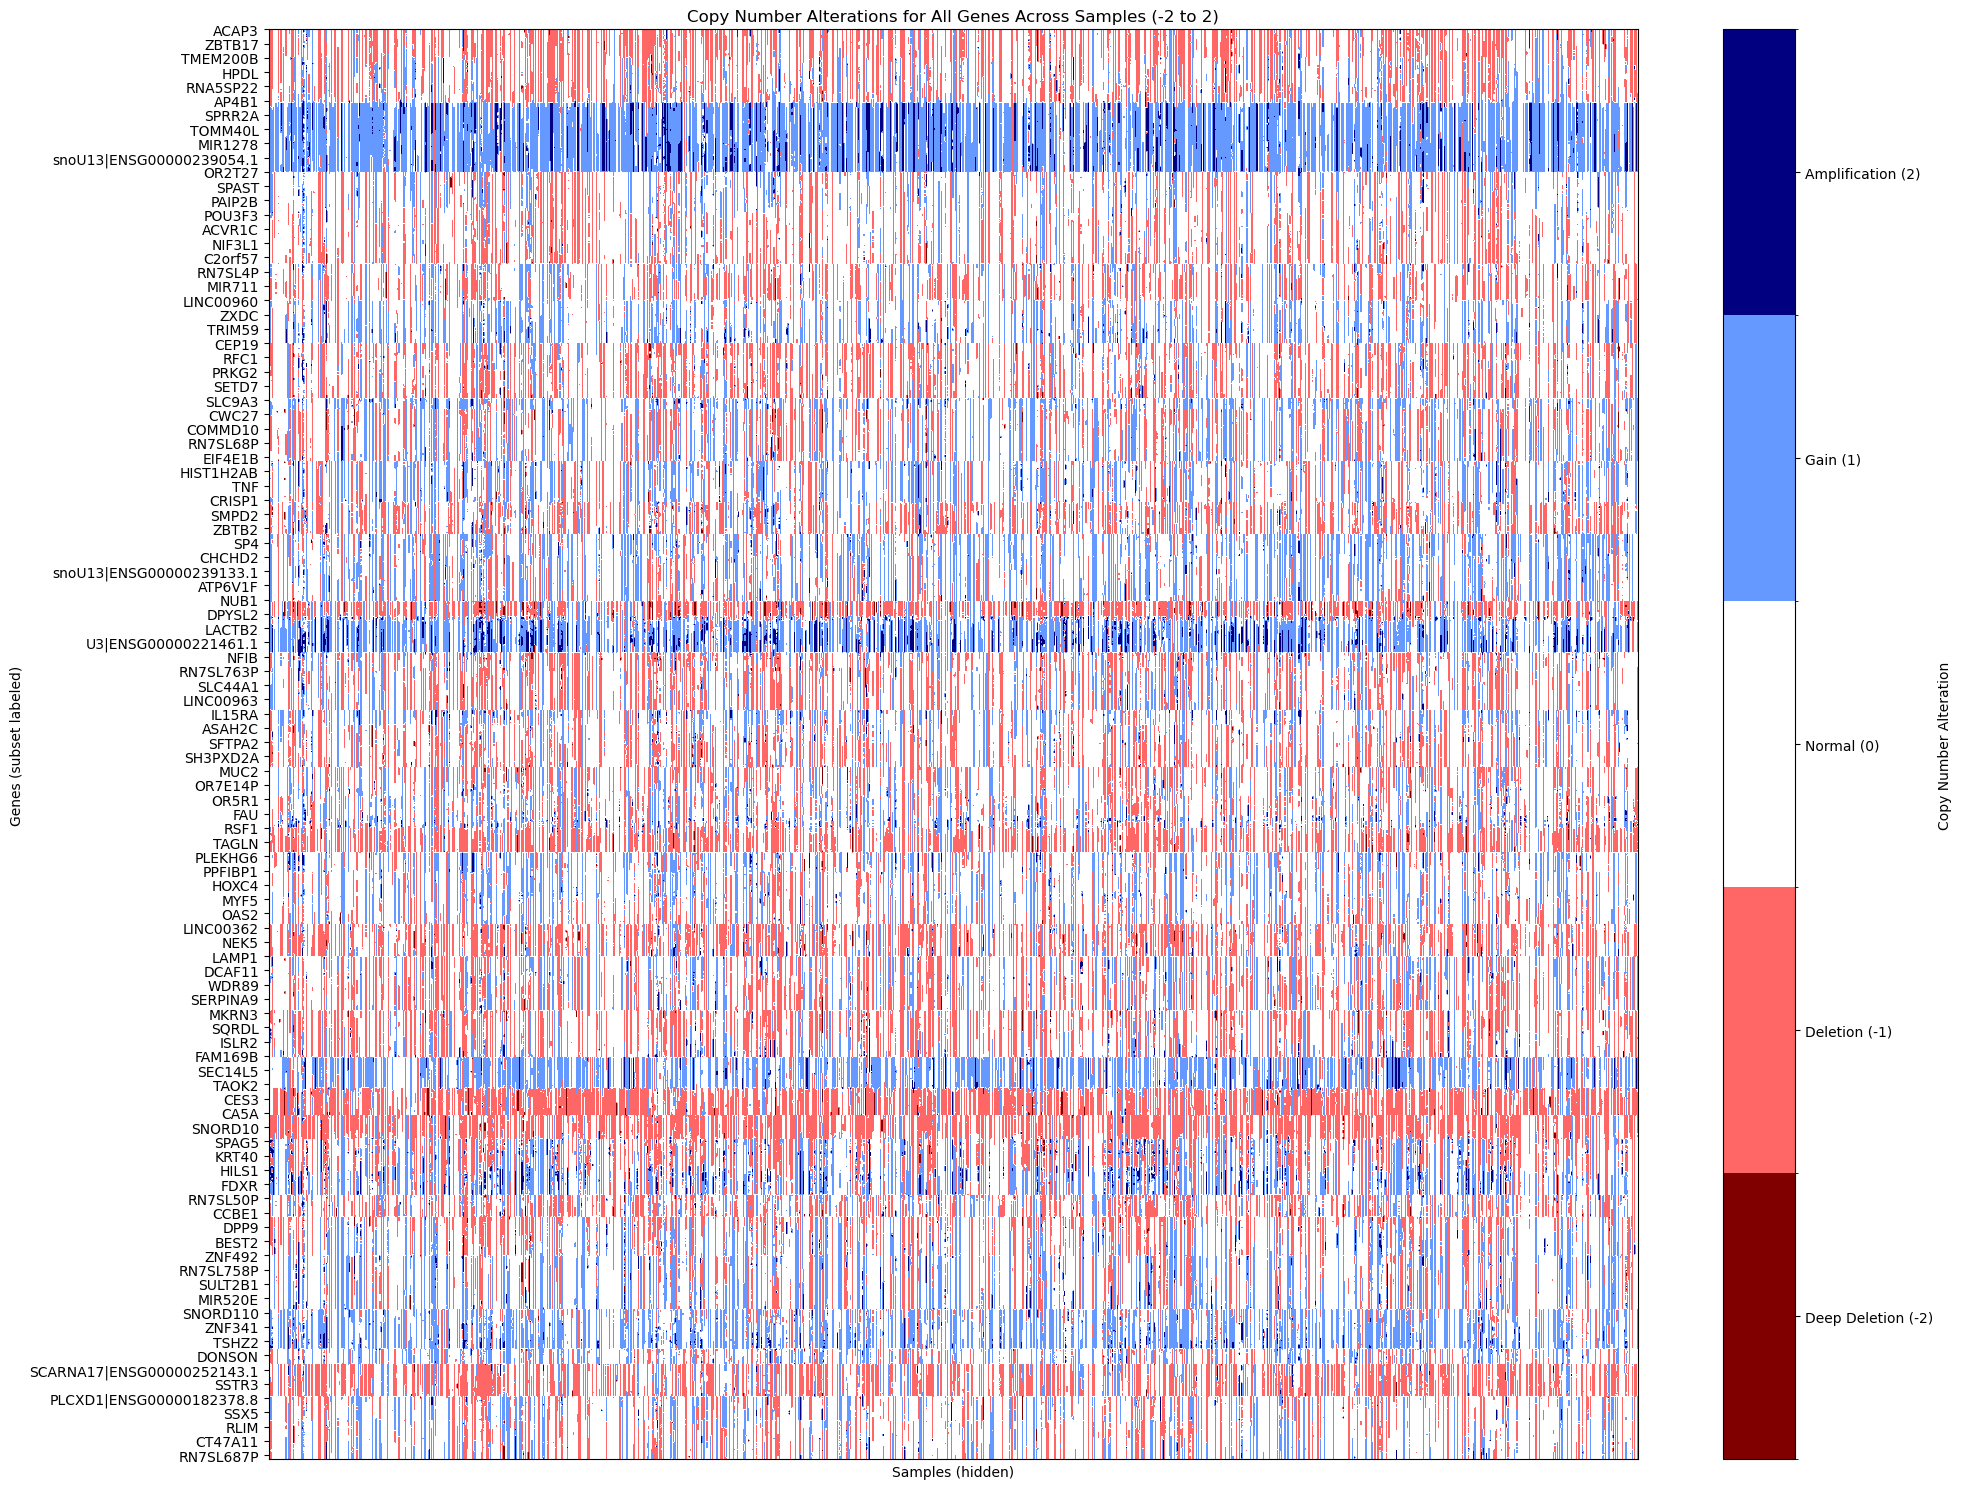

In [14]:
# PLOT
plt.figure(figsize=(20, 15))

# Plot the heatmap
plt.imshow(data, cmap=cmap, norm=norm, aspect='auto')

# Show all gene names on Y-axis (clutter)
# plt.yticks(ticks=range(len(df.index)), labels=df.index)

# Compute how often to show gene names to avoid clutter
yticks_every = max(len(df.index)//100, 1) # total number of genes (25000) // 100 = 250 -> every 250th gene
                                          # max -> if number of genes < 100 ( len(df.index) // 100 = 0 ) -> fall back to 1 as the minimum spacing

# Set Y-axis ticks (gene name at every 'yticks_every' interval)
plt.yticks(ticks=range(0, len(df.index), yticks_every),
           labels=[df.index[i] for i in range(0, len(df.index), yticks_every)])

# Hide X-axis ticks (sample IDs)
plt.xticks([])

# Set colorbar (legend)
cbar = plt.colorbar(ticks=[-2, -1, 0, 1, 2])

# cbar.ax -> Axes object (a matplotlib Axes instance) inside the colorbar -> controls how the colorbar is drawn, including ticks and labels
cbar.ax.set_yticklabels([
    'Deep Deletion (-2)', 'Deletion (-1)', 'Normal (0)',
    'Gain (1)', 'Amplification (2)'
])
cbar.set_label('Copy Number Alteration')

plt.title("Copy Number Alterations for All Genes Across Samples (-2 to 2)")
plt.xlabel("Samples (hidden)")
plt.ylabel("Genes (subset labeled)")

plt.tight_layout()
plt.show()

In [15]:
# Compute CNA frequency per gene (% of samples altered)
altered = df != 0  # boolean DataFrame where True means altered
altered.head()

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5L-AAT1-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
ACAP3,False,True,True,False,False,False,False,True,False,True,...,False,True,False,False,True,True,False,True,True,False
ACTRT2,False,True,True,False,False,False,False,True,False,True,...,False,True,False,False,True,True,False,True,True,False
AGRN,False,True,True,False,False,False,False,True,False,True,...,False,True,False,False,True,True,False,True,True,False
ANKRD65,False,True,True,False,False,False,False,True,False,True,...,False,True,False,False,True,True,False,True,True,False
ATAD3A,False,True,True,False,False,False,False,True,False,True,...,False,True,False,False,True,True,False,True,True,False


In [16]:
cna_freq = altered.sum(axis=1) / df.shape[1] * 100
cna_freq = cna_freq.sort_values(ascending=False)

print("Top 20 genes by alteration frequency:")
print(cna_freq.head(20))

Top 20 genes by alteration frequency:
Gene Symbol
NFASC                         77.870370
LRRN2                         77.870370
RNA5SP74                      77.870370
MDM4                          77.870370
RNA5SP75                      77.777778
PIK3C2B                       77.777778
SCARNA20|ENSG00000251861.1    77.777778
PLEKHA6                       77.777778
PPP1R15B                      77.777778
SNORD112|ENSG00000252946.1    77.592593
GOLT1A                        77.592593
KISS1                         77.592593
REN                           77.500000
CNTN2                         77.500000
TMEM81                        77.500000
RBBP5                         77.500000
LEMD1                         77.500000
FAM72A                        77.407407
ETNK2                         77.407407
SOX13                         77.407407
dtype: float64


In [17]:
# Convert Series to Dataframe
cna_freq_df = cna_freq.to_frame(name='Alteration Frequency')
cna_freq_df.index.name = 'Gene Symbol'

print(cna_freq_df.head())

# Save to csv file
cna_freq_df.to_csv("UCSC-GISTIC2-Thresholded-TCGA-BRCA-Copy-Number-Gene-Level_Altered-Gene-Frequency_Feature-Matrix.csv")

             Alteration Frequency
Gene Symbol                      
NFASC                   77.870370
LRRN2                   77.870370
RNA5SP74                77.870370
MDM4                    77.870370
RNA5SP75                77.777778


In [18]:
# Feature matrix of altered genes
feature_gene = altered.sum(axis=1) # axis=1 -> row wise
feature_gene = feature_gene.sort_values(ascending=False)

print("Feature Matrix of altered genes (top 20):")
print(feature_gene.head(20))

Feature Matrix of altered genes (top 20):
Gene Symbol
NFASC                         841
LRRN2                         841
RNA5SP74                      841
MDM4                          841
RNA5SP75                      840
PIK3C2B                       840
SCARNA20|ENSG00000251861.1    840
PLEKHA6                       840
PPP1R15B                      840
SNORD112|ENSG00000252946.1    838
GOLT1A                        838
KISS1                         838
REN                           837
CNTN2                         837
TMEM81                        837
RBBP5                         837
LEMD1                         837
FAM72A                        836
ETNK2                         836
SOX13                         836
dtype: int64


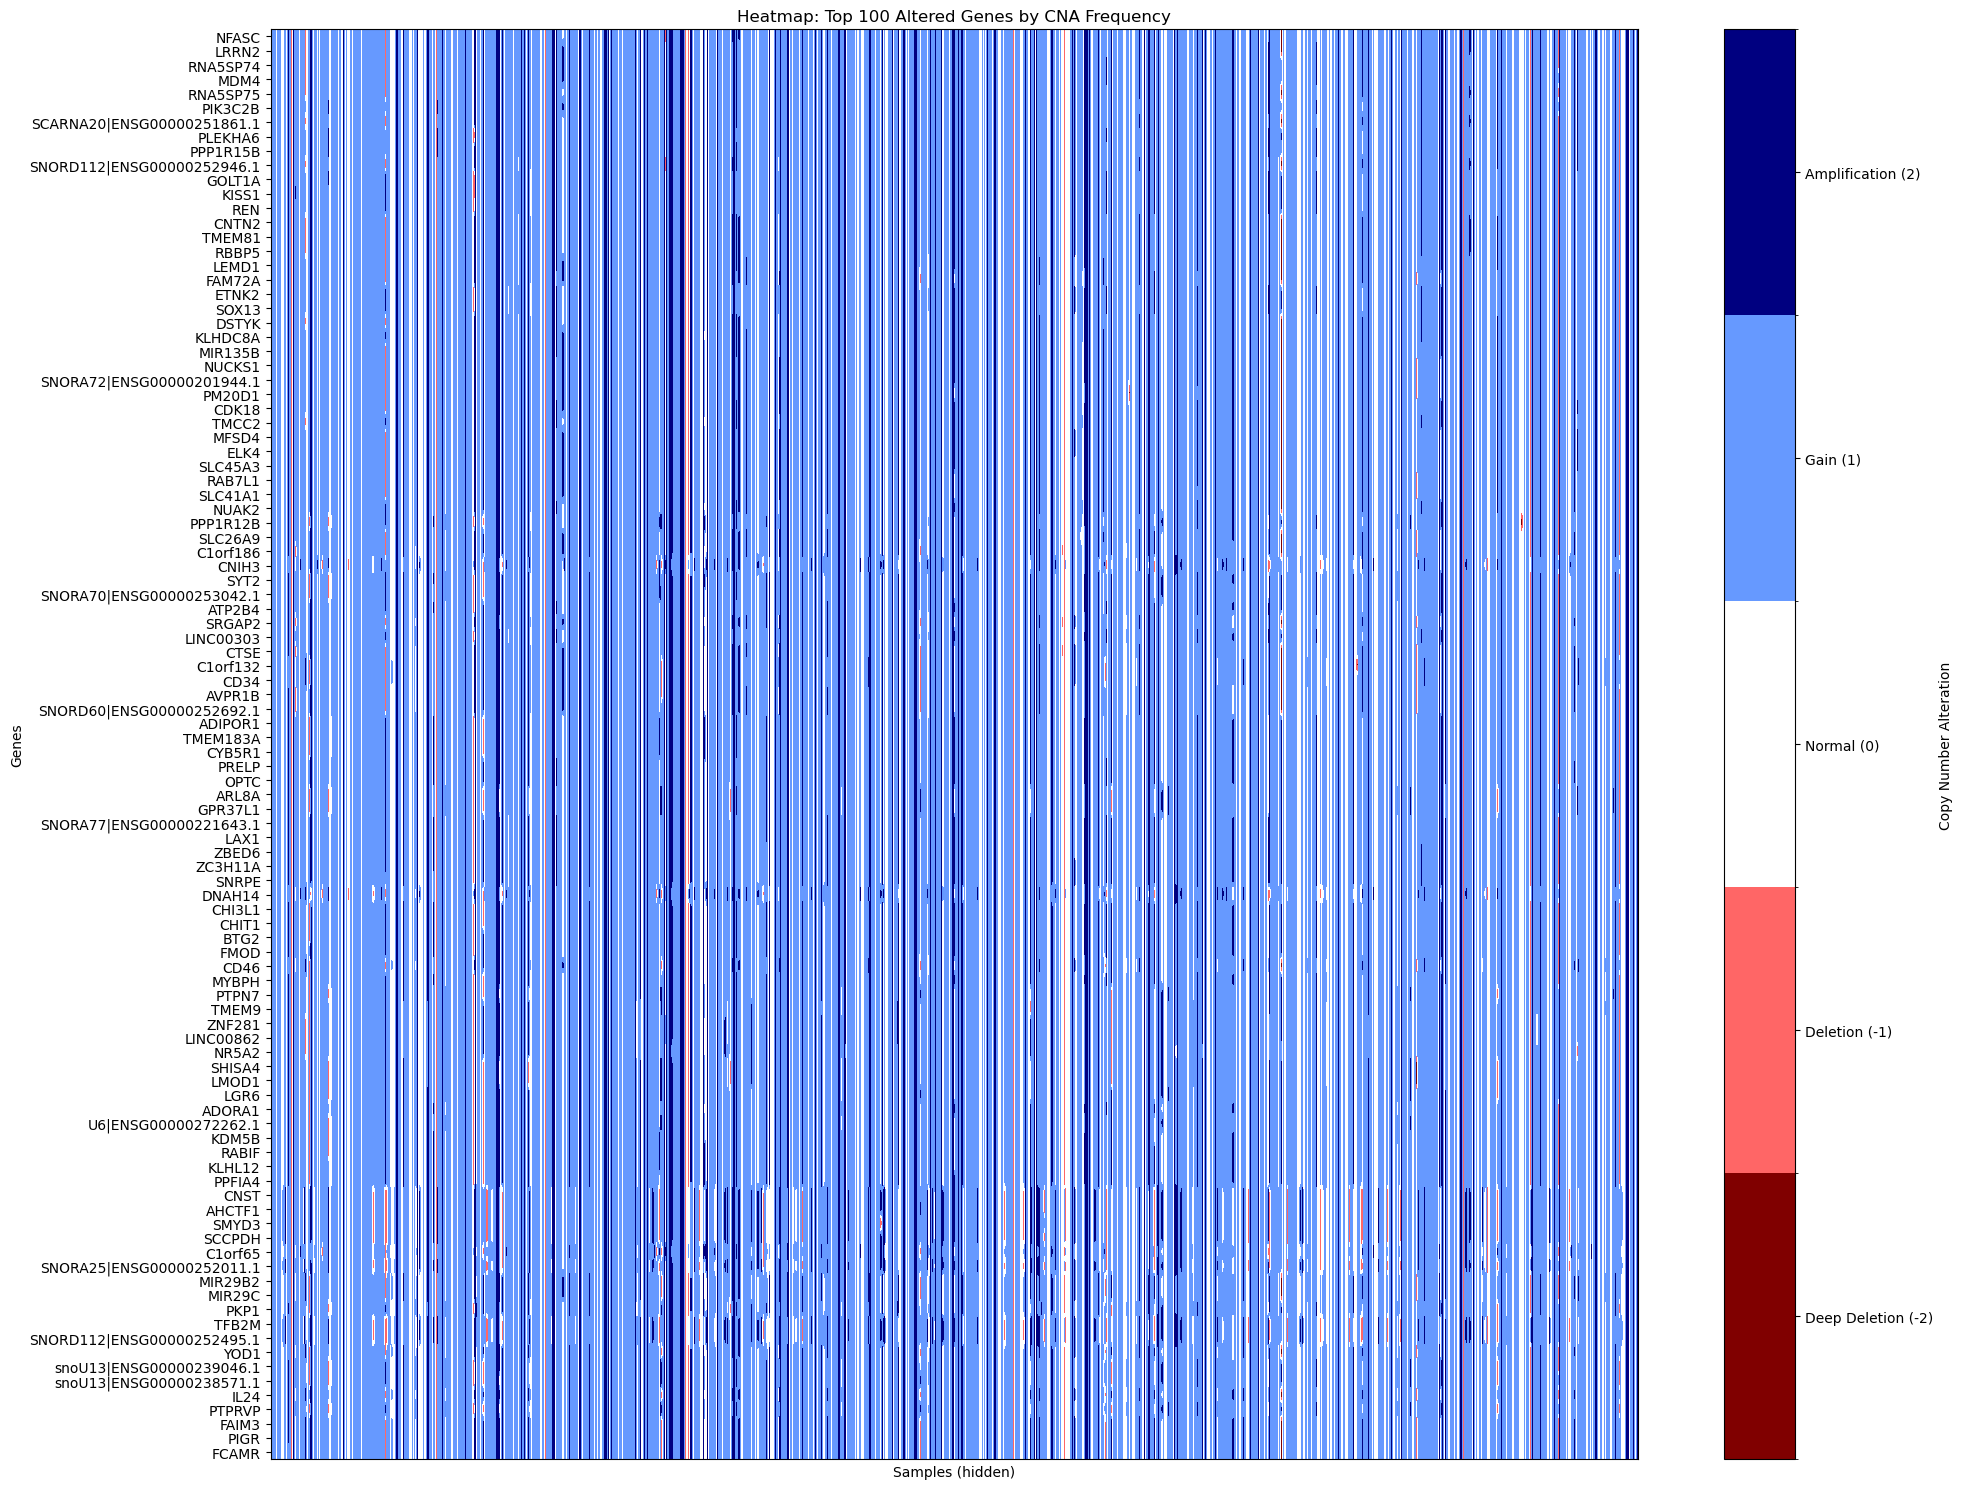

In [19]:
# Heatmap for top 100 altered genes
top100_genes = cna_freq.head(100).index
df_top100 = df.loc[top100_genes]

# Plot heatmap for top 100 genes
plt.figure(figsize=(20, 15))
plt.imshow(df_top100.values, cmap=cmap, norm=norm, aspect='auto')

yticks_every = max(len(df_top100.index)//100, 1)
plt.yticks(ticks=range(0, len(df_top100.index), yticks_every),
           labels=[df_top100.index[i] for i in range(0, len(df_top100.index), yticks_every)])
plt.xticks([])

cbar = plt.colorbar(ticks=[-2, -1, 0, 1, 2])
cbar.ax.set_yticklabels([
    'Deep Deletion (-2)', 'Deletion (-1)', 'Normal (0)',
    'Gain (1)', 'Amplification (2)'
])
cbar.set_label('Copy Number Alteration')

plt.title("Heatmap: Top 100 Altered Genes by CNA Frequency")
plt.xlabel("Samples (hidden)")
plt.ylabel("Genes")
plt.tight_layout()
plt.show()

Significantly amplified genes (>5% samples): 2699
Gene Symbol
PVT1         21.203704
MYC          21.203704
CASC8        21.018519
POU5F1B      20.833333
MIR1208      20.370370
MIR1205      20.277778
RN7SKP226    20.185185
TMEM75       20.185185
MIR1207      20.092593
LINC00536    20.000000
dtype: float64


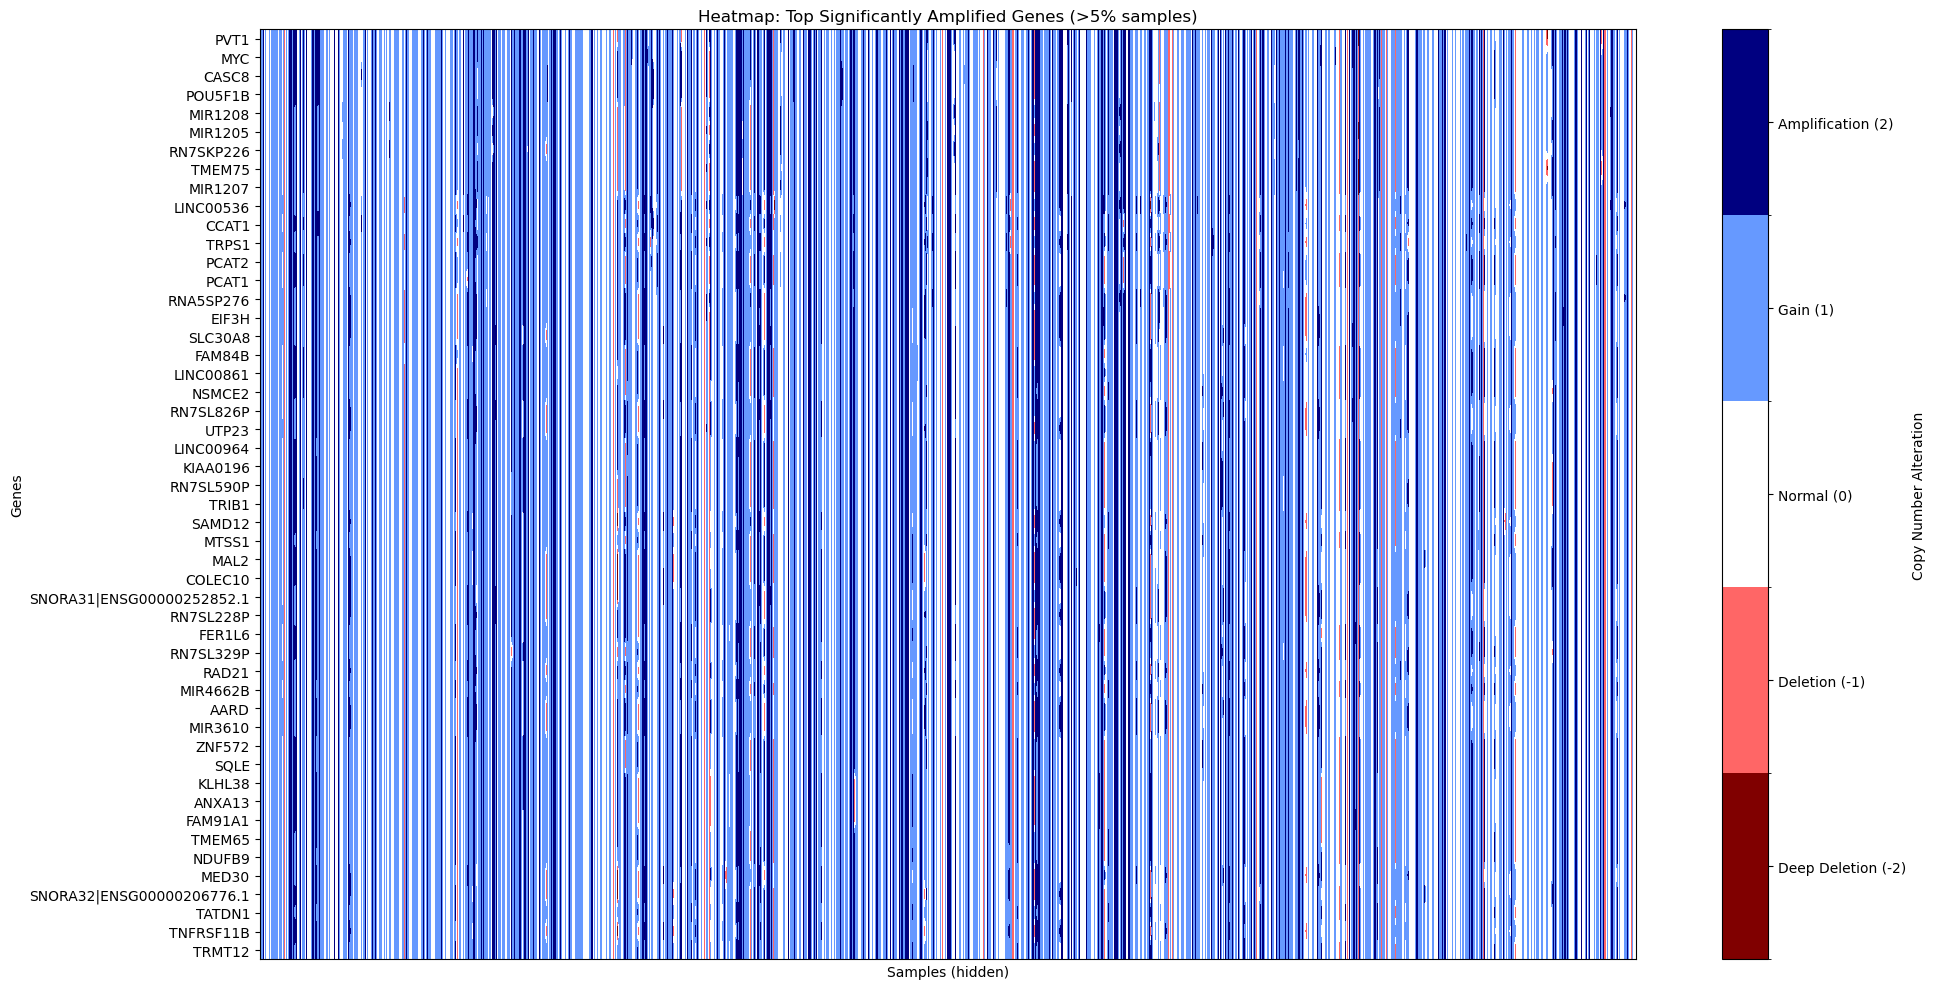

In [20]:
# Significantly amplified genes
# Identify genes amplified in more than 5% of samples (copy number value == 2)
amp_freq = (df == 2).sum(axis=1) / df.shape[1] * 100
significant_amp_genes = amp_freq[amp_freq > 5].sort_values(ascending=False)
print(f"Significantly amplified genes (>5% samples): {len(significant_amp_genes)}")
print(significant_amp_genes.head(10))

# Plot heatmap for top 50 significantly amplified genes if available
top_amp_genes = significant_amp_genes.head(50).index
df_amp = df.loc[top_amp_genes]

plt.figure(figsize=(20, 10))
plt.imshow(df_amp.values, cmap=cmap, norm=norm, aspect='auto')
plt.yticks(ticks=range(len(df_amp.index)), labels=df_amp.index)
plt.xticks([])

cbar = plt.colorbar(ticks=[-2, -1, 0, 1, 2])
cbar.ax.set_yticklabels([
    'Deep Deletion (-2)', 'Deletion (-1)', 'Normal (0)',
    'Gain (1)', 'Amplification (2)'
])
cbar.set_label('Copy Number Alteration')

plt.title("Heatmap: Top Significantly Amplified Genes (>5% samples)")
plt.xlabel("Samples (hidden)")
plt.ylabel("Genes")
plt.tight_layout()
plt.show()

Significantly deleted genes (>5% samples): 228
Gene Symbol
CSMD1        9.629630
RNA5SP251    7.222222
DLGAP2       6.759259
RN7SL872P    6.666667
MYOM2        6.574074
ARHGEF10     6.574074
FBXO25       6.481481
KBTBD11      6.481481
ERICH1       6.481481
MIR596       6.481481
dtype: float64


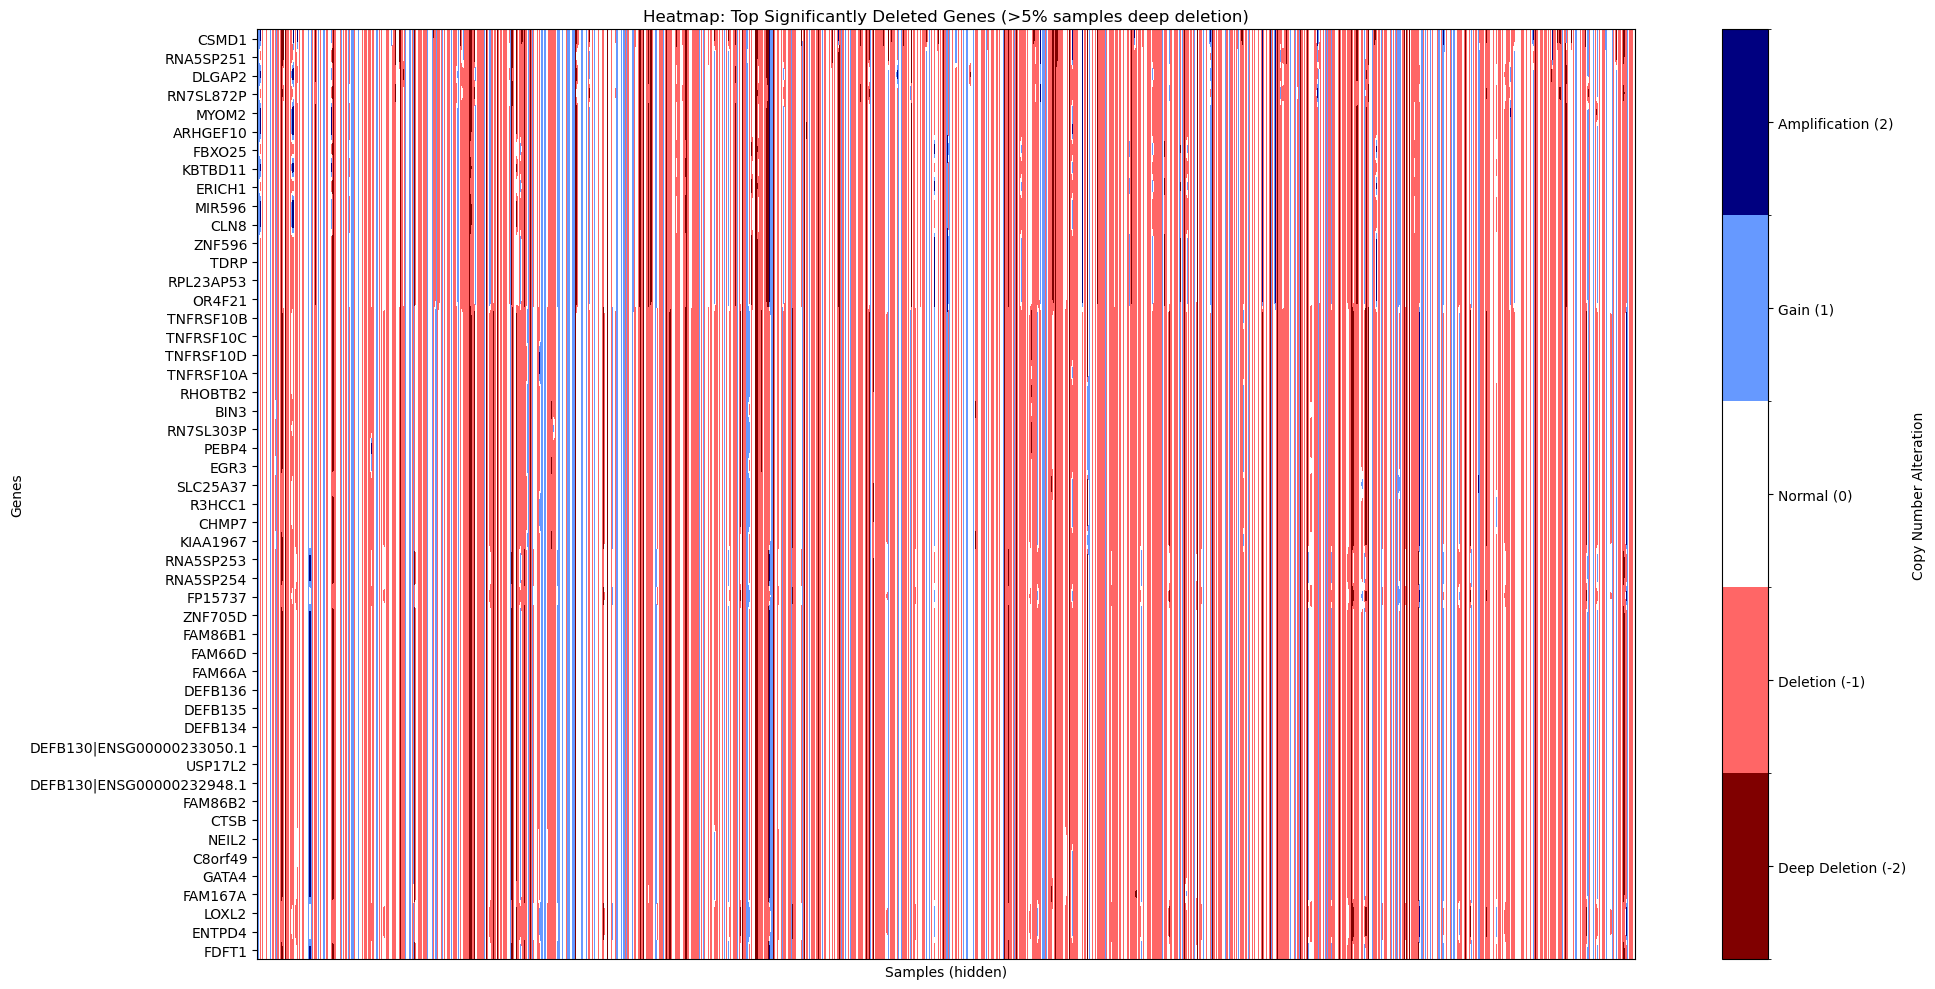

In [21]:
# Significantly deleted genes
# Identify genes deleted in more than 5% of samples (copy number value == -2 -> deep deletion)
del_freq = (df == -2).sum(axis=1) / df.shape[1] * 100
significant_del_genes = del_freq[del_freq > 5].sort_values(ascending=False)
print(f"Significantly deleted genes (>5% samples): {len(significant_del_genes)}")
print(significant_del_genes.head(10))

# Plot heatmap for top 50 significantly deleted genes if available
top_del_genes = significant_del_genes.head(50).index
df_del = df.loc[top_del_genes]

plt.figure(figsize=(20, 10))
plt.imshow(df_del.values, cmap=cmap, norm=norm, aspect='auto')
plt.yticks(ticks=range(len(df_del.index)), labels=df_del.index)
plt.xticks([])

cbar = plt.colorbar(ticks=[-2, -1, 0, 1, 2])
cbar.ax.set_yticklabels([
    'Deep Deletion (-2)', 'Deletion (-1)', 'Normal (0)',
    'Gain (1)', 'Amplification (2)'
])
cbar.set_label('Copy Number Alteration')

plt.title("Heatmap: Top Significantly Deleted Genes (>5% samples deep deletion)")
plt.xlabel("Samples (hidden)")
plt.ylabel("Genes")
plt.tight_layout()
plt.show()